# Day 4
batch size 256 lr 1e-3, normed weighted, rotated, cartesian

### Import modules

In [1]:
%matplotlib inline
from __future__ import division
import sys
import os
os.environ['MKL_THREADING_LAYER']='GNU'
sys.path.append('../')
from Modules.Basics import *
from Modules.Class_Basics import *

/home/giles/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/home/giles/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


## Options

In [2]:
classTrainFeatures = ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']
inputPipe, outputPipe = getPreProcPipes(normIn=True)
classModel = 'modelSwish'
varSet = "basic_rot_features"

nSplits = 10
ensembleSize = 10
ensembleMode = 'loss'

maxEpochs = 200
compileArgs = {'loss':'binary_crossentropy', 'optimizer':'adam'}
trainParams = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
modelParams = {'version':classModel, 'nIn':len(classTrainFeatures), 'compileArgs':compileArgs}

print "\nTraining on", len(classTrainFeatures), "features:", [var for var in classTrainFeatures]


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [3]:
trainData = h5py.File(dirLoc + 'train.hdf5', "r+")
valData = h5py.File(dirLoc + 'val.hdf5', "r+")

## Determine LR

2 classes found, running in binary mode


______________________________________
Training finished
Cross-validation took 1.311s 


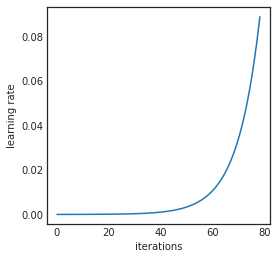

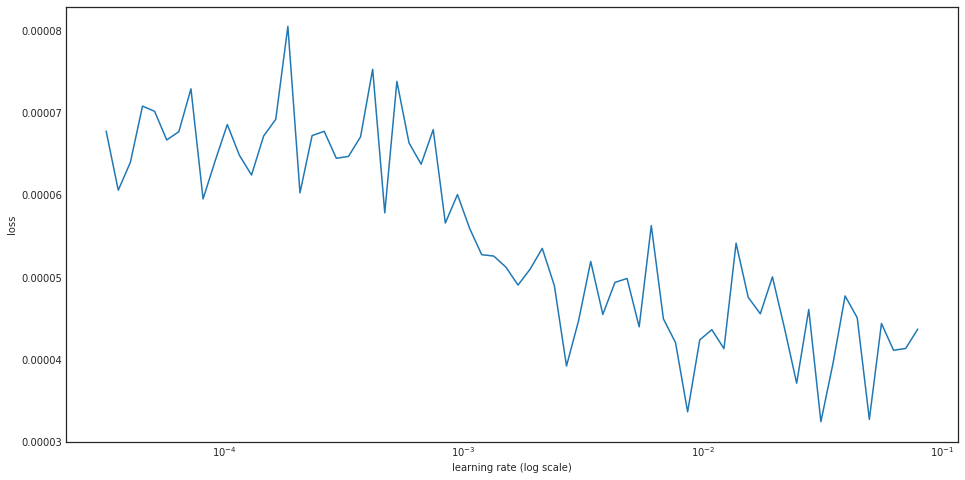

______________________________________



In [13]:
lrFinder = batchLRFindClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, lrBounds=[1e-5,1e-1], trainOnWeights=True, verbose=0)

In [17]:
compileArgs['lr'] = 1e-3

## Train classifier

Using cosine annealing
Training using weights
Running fold 1 / 10
2 classes found, running in binary mode



/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.135245). Check your callbacks.
  % delta_t_median)


1 New best found: 4.13775417097e-05
2 New best found: 3.63846392441e-05
3 New best found: 3.55551837738e-05
4 New best found: 3.44268268792e-05
5 New best found: 3.39363631685e-05
6 New best found: 3.32987753114e-05
7 New best found: 3.3241900657e-05
10 New best found: 3.30696077839e-05
11 New best found: 3.29438082624e-05
12 New best found: 3.26519509335e-05
13 New best found: 3.26213938134e-05
14 New best found: 3.25294503873e-05
15 New best found: 3.25052943796e-05
21 New best found: 3.24554525482e-05
23 New best found: 3.23830207075e-05
24 New best found: 3.23825019261e-05
25 New best found: 3.22543893387e-05
26 New best found: 3.21267056121e-05
29 New best found: 3.20910796215e-05
30 New best found: 3.20902618351e-05
31 New best found: 3.20885004241e-05
42 New best found: 3.20073986206e-05
45 New best found: 3.19068394978e-05
48 New best found: 3.18222574587e-05
52 New best found: 3.17280502185e-05
58 New best found: 3.17112521089e-05
59 New best found: 3.17093204723e-05
60 New be

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.146909). Check your callbacks.
  % delta_t_median)


1 New best found: 4.22785488923e-05
2 New best found: 3.72610590991e-05
3 New best found: 3.646228617e-05
4 New best found: 3.5571918794e-05
5 New best found: 3.50838495099e-05
6 New best found: 3.45552130585e-05
7 New best found: 3.44896159217e-05
10 New best found: 3.43724075548e-05
12 New best found: 3.37544618506e-05
13 New best found: 3.36553514284e-05
14 New best found: 3.36387218828e-05
15 New best found: 3.36166744114e-05
23 New best found: 3.33385963768e-05
24 New best found: 3.32669834151e-05
25 New best found: 3.32444855225e-05
26 New best found: 3.3158161344e-05
28 New best found: 3.31255428487e-05
29 New best found: 3.30851410872e-05
30 New best found: 3.30845612142e-05
31 New best found: 3.30795213252e-05
44 New best found: 3.29430190503e-05
47 New best found: 3.29083545778e-05
50 New best found: 3.28768310085e-05
51 New best found: 3.27237666967e-05
58 New best found: 3.27018055131e-05
60 New best found: 3.26979316546e-05
61 New best found: 3.2689627418e-05
62 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.170845). Check your callbacks.
  % delta_t_median)


1 New best found: 4.17175013899e-05
2 New best found: 3.71940774405e-05
3 New best found: 3.60822595278e-05
4 New best found: 3.51430518202e-05
5 New best found: 3.46892091509e-05
6 New best found: 3.40720698378e-05
7 New best found: 3.40066767321e-05
10 New best found: 3.37451454684e-05
11 New best found: 3.36319084993e-05
12 New best found: 3.3329658509e-05
13 New best found: 3.32591864428e-05
14 New best found: 3.31496521163e-05
15 New best found: 3.31382890028e-05
23 New best found: 3.30880661775e-05
24 New best found: 3.30050892369e-05
25 New best found: 3.29530869298e-05
26 New best found: 3.28364494386e-05
28 New best found: 3.27829304901e-05
29 New best found: 3.2751284435e-05
30 New best found: 3.2733437494e-05
31 New best found: 3.27319532718e-05
45 New best found: 3.26598417685e-05
46 New best found: 3.26033713899e-05
54 New best found: 3.24815228232e-05
57 New best found: 3.24745989969e-05
59 New best found: 3.24611338164e-05
60 New best found: 3.24566482712e-05
61 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.181197). Check your callbacks.
  % delta_t_median)


1 New best found: 4.09876214389e-05
2 New best found: 3.70007067898e-05
3 New best found: 3.59072291242e-05
4 New best found: 3.50247611421e-05
5 New best found: 3.41383794464e-05
6 New best found: 3.36014219911e-05
7 New best found: 3.34720496134e-05
9 New best found: 3.33539394227e-05
10 New best found: 3.31155820915e-05
11 New best found: 3.27059565408e-05
12 New best found: 3.25732804377e-05
13 New best found: 3.24534141289e-05
14 New best found: 3.24013273442e-05
15 New best found: 3.23867048995e-05
21 New best found: 3.23604443923e-05
22 New best found: 3.22477725023e-05
23 New best found: 3.20866816207e-05
24 New best found: 3.20356822624e-05
25 New best found: 3.20018795871e-05
26 New best found: 3.19869333319e-05
27 New best found: 3.18485134121e-05
28 New best found: 3.18347414533e-05
29 New best found: 3.1807634431e-05
30 New best found: 3.18001979421e-05
47 New best found: 3.16760821582e-05
51 New best found: 3.16748946053e-05
54 New best found: 3.15568473627e-05
56 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.194535). Check your callbacks.
  % delta_t_median)


1 New best found: 4.12790448425e-05
2 New best found: 3.75321492098e-05
3 New best found: 3.64369466598e-05
4 New best found: 3.52835552585e-05
5 New best found: 3.43573300746e-05
6 New best found: 3.40505006022e-05
7 New best found: 3.39434252148e-05
10 New best found: 3.32380610556e-05
11 New best found: 3.31550045511e-05
12 New best found: 3.294352199e-05
13 New best found: 3.27763423739e-05
14 New best found: 3.27367601993e-05
15 New best found: 3.27325942971e-05
17 New best found: 3.26855620098e-05
21 New best found: 3.25219468628e-05
23 New best found: 3.24263480171e-05
24 New best found: 3.22845787665e-05
25 New best found: 3.22317280837e-05
27 New best found: 3.221278645e-05
28 New best found: 3.21547393016e-05
29 New best found: 3.21007909706e-05
30 New best found: 3.20938455206e-05
31 New best found: 3.20906869041e-05
45 New best found: 3.19884998331e-05
48 New best found: 3.1988080111e-05
51 New best found: 3.19157084831e-05
52 New best found: 3.18721393401e-05
54 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.208205). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.104490). Check your callbacks.
  % delta_t_median)


1 New best found: 4.1701737891e-05
2 New best found: 3.78258898766e-05
3 New best found: 3.68958343474e-05
4 New best found: 3.61930043703e-05
5 New best found: 3.54471289824e-05
6 New best found: 3.53949175608e-05
7 New best found: 3.50687413244e-05
8 New best found: 3.49483834437e-05
10 New best found: 3.4599282929e-05
11 New best found: 3.41678336645e-05
12 New best found: 3.38798782808e-05
13 New best found: 3.37719281711e-05
14 New best found: 3.37441774114e-05
15 New best found: 3.3715611579e-05
21 New best found: 3.35833863826e-05
22 New best found: 3.34713680135e-05
25 New best found: 3.31195052422e-05
26 New best found: 3.31156373472e-05
27 New best found: 3.309610253e-05
29 New best found: 3.30694349558e-05
30 New best found: 3.30589260411e-05
31 New best found: 3.30508018064e-05
43 New best found: 3.28631345024e-05
50 New best found: 3.28357329059e-05
52 New best found: 3.27114660889e-05
88 New best found: 3.26163683125e-05
106 New best found: 3.2604005917e-05
107 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.222738). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.111760). Check your callbacks.
  % delta_t_median)


1 New best found: 4.08785272819e-05
2 New best found: 3.70857801631e-05
3 New best found: 3.62696924785e-05
4 New best found: 3.5857358765e-05
5 New best found: 3.51028090441e-05
6 New best found: 3.46078207268e-05
7 New best found: 3.44477817747e-05
10 New best found: 3.41293016522e-05
11 New best found: 3.37210834626e-05
12 New best found: 3.36305577545e-05
13 New best found: 3.34650474469e-05
14 New best found: 3.34035085207e-05
15 New best found: 3.33979513118e-05
22 New best found: 3.33293331823e-05
25 New best found: 3.30106636445e-05
27 New best found: 3.29332918619e-05
28 New best found: 3.2929621309e-05
29 New best found: 3.28868369663e-05
30 New best found: 3.28839944082e-05
31 New best found: 3.28833340482e-05
43 New best found: 3.28161981695e-05
47 New best found: 3.27215262558e-05
50 New best found: 3.26556219074e-05
53 New best found: 3.26321900911e-05
56 New best found: 3.26259753817e-05
57 New best found: 3.25560268522e-05
58 New best found: 3.25369944951e-05
59 New bes

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.258930). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.129842). Check your callbacks.
  % delta_t_median)


1 New best found: 4.13004919398e-05
2 New best found: 3.65795706405e-05
3 New best found: 3.58158740066e-05
4 New best found: 3.47848708687e-05
5 New best found: 3.37269892087e-05
6 New best found: 3.34125880394e-05
7 New best found: 3.32439983558e-05
9 New best found: 3.31697345534e-05
10 New best found: 3.30151335352e-05
11 New best found: 3.2459047854e-05
12 New best found: 3.24206251103e-05
13 New best found: 3.23174769295e-05
14 New best found: 3.22467659074e-05
18 New best found: 3.22157538065e-05
20 New best found: 3.21957525866e-05
21 New best found: 3.20822334534e-05
23 New best found: 3.20041188762e-05
25 New best found: 3.18899428885e-05
27 New best found: 3.17101004486e-05
30 New best found: 3.16942252419e-05
31 New best found: 3.16908956381e-05
44 New best found: 3.1681208373e-05
48 New best found: 3.15948179653e-05
49 New best found: 3.15200348729e-05
53 New best found: 3.14369335977e-05
54 New best found: 3.13610196509e-05
55 New best found: 3.13551669059e-05
57 New best

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.342895). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.171811). Check your callbacks.
  % delta_t_median)


1 New best found: 4.13212726696e-05
2 New best found: 3.719012246e-05
3 New best found: 3.66660812687e-05
4 New best found: 3.64459133992e-05
5 New best found: 3.50443164197e-05
6 New best found: 3.45939172361e-05
9 New best found: 3.4340556201e-05
10 New best found: 3.43083305986e-05
11 New best found: 3.40083066593e-05
12 New best found: 3.3783589453e-05
13 New best found: 3.37346713407e-05
14 New best found: 3.36155293342e-05
15 New best found: 3.35800170336e-05
22 New best found: 3.34078551022e-05
23 New best found: 3.32446250154e-05
25 New best found: 3.31651477467e-05
26 New best found: 3.30638097517e-05
27 New best found: 3.30228492742e-05
28 New best found: 3.2984738697e-05
29 New best found: 3.29751896302e-05
30 New best found: 3.29624019111e-05
31 New best found: 3.29604623223e-05
43 New best found: 3.29025622152e-05
44 New best found: 3.27951085314e-05
49 New best found: 3.27751300587e-05
52 New best found: 3.27505417137e-05
54 New best found: 3.26796675934e-05
55 New best f

/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.278142). Check your callbacks.
  % delta_t_median)
/home/giles/anaconda2/lib/python2.7/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.139451). Check your callbacks.
  % delta_t_median)


1 New best found: 4.16582042401e-05
2 New best found: 3.76745213589e-05
3 New best found: 3.6895599225e-05
4 New best found: 3.57878702002e-05
5 New best found: 3.52534441203e-05
6 New best found: 3.48728629361e-05
7 New best found: 3.47637694655e-05
9 New best found: 3.45831823898e-05
11 New best found: 3.41477116116e-05
12 New best found: 3.39389874085e-05
13 New best found: 3.37966410062e-05
14 New best found: 3.37040871865e-05
15 New best found: 3.36778089195e-05
22 New best found: 3.34086519264e-05
24 New best found: 3.33785822237e-05
25 New best found: 3.32911207582e-05
26 New best found: 3.31857694698e-05
28 New best found: 3.31325690718e-05
29 New best found: 3.31157462966e-05
30 New best found: 3.31112070503e-05
31 New best found: 3.31082017679e-05
40 New best found: 3.3043763848e-05
49 New best found: 3.2810648424e-05
55 New best found: 3.28014010036e-05
56 New best found: 3.2773767297e-05
59 New best found: 3.27660658347e-05
60 New best found: 3.27524430421e-05
61 New best f

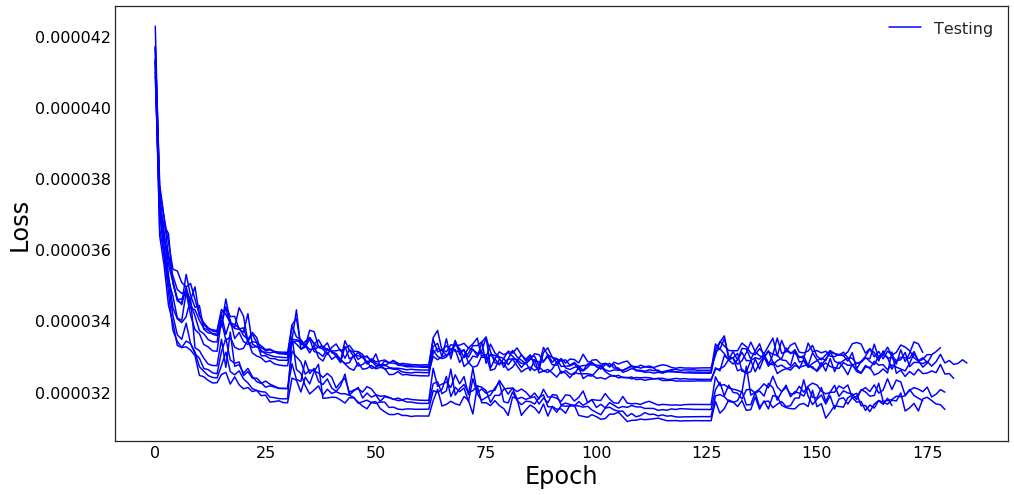

Mean wAUC = 0.0644 +- 0.0007
______________________________________



In [19]:
results, histories = batchTrainClassifier(trainData, nSplits, getClassifier, modelParams, trainParams, patience=60, cosAnnealMult=2, trainOnWeights=True, maxEpochs=maxEpochs, verbose=1)

## Construct ensemble

In [20]:
with open('train_weights/resultsFile.pkl', 'r') as fin:   
    results = pickle.load(fin)

In [21]:
ensemble, weights = assembleEnsemble(results, ensembleSize, ensembleMode, compileArgs)

Choosing ensemble by loss
Model 0 is 7 with loss = 3.1161864856847734e-05
Model 1 is 3 with loss = 3.128688850896817e-05
Model 2 is 0 with loss = 3.147601043282404e-05
Model 3 is 4 with loss = 3.161946646030573e-05
Model 4 is 6 with loss = 3.229816988939985e-05
Model 5 is 2 with loss = 3.234597163735096e-05
Model 6 is 1 with loss = 3.251997507651489e-05
Model 7 is 8 with loss = 3.252830723450606e-05
Model 8 is 5 with loss = 3.2554815061365846e-05
Model 9 is 9 with loss = 3.266029549180944e-05


## Response on development data

In [22]:
batchEnsemblePredict(ensemble, weights, trainData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.00050884065351s per sample

Predicting batch 2 out of 10
Prediction took 0.000254559520483s per sample

Predicting batch 3 out of 10
Prediction took 0.000275633179076s per sample

Predicting batch 4 out of 10
Prediction took 0.000261128008366s per sample

Predicting batch 5 out of 10
Prediction took 0.000256218492985s per sample

Predicting batch 6 out of 10
Prediction took 0.000255467796326s per sample

Predicting batch 7 out of 10
Prediction took 0.000268921101093s per sample

Predicting batch 8 out of 10
Prediction took 0.000283109407984s per sample

Predicting batch 9 out of 10
Prediction took 0.000273440979655s per sample

Predicting batch 10 out of 10
Prediction took 0.000308430119153s per sample



In [23]:
print 'Training ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData)),
                                                            roc_auc_score(getFeature('targets', trainData), getFeature('pred', trainData), sample_weight=getFeature('weights', trainData)))

Training ROC AUC: unweighted 0.905021840328, weighted 0.940407170069


## Response on val data

In [24]:
batchEnsemblePredict(ensemble, weights, valData, ensembleSize=10, verbose=1)

Predicting batch 1 out of 10
Prediction took 0.000288227176666s per sample

Predicting batch 2 out of 10
Prediction took 0.000271236371994s per sample

Predicting batch 3 out of 10
Prediction took 0.000319272994995s per sample

Predicting batch 4 out of 10
Prediction took 0.00032583861351s per sample

Predicting batch 5 out of 10
Prediction took 0.000277746582031s per sample

Predicting batch 6 out of 10
Prediction took 0.000260381603241s per sample

Predicting batch 7 out of 10
Prediction took 0.000264502382278s per sample

Predicting batch 8 out of 10
Prediction took 0.000267819833755s per sample

Predicting batch 9 out of 10
Prediction took 0.000276211023331s per sample

Predicting batch 10 out of 10
Prediction took 0.000267650413513s per sample



In [25]:
print 'Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(getFeature('targets', valData), getFeature('pred', valData)),
                                                           roc_auc_score(getFeature('targets', valData), getFeature('pred', valData), sample_weight=getFeature('weights', valData)))

Testing ROC AUC: unweighted 0.901961805411, weighted 0.934962940187


## Evaluation

### Import in dataframe

In [4]:
def convertToDF(datafile, columns={'gen_target', 'gen_weight', 'pred_class'}, nLoad=-1):
    data = pandas.DataFrame()
    data['gen_target'] = getFeature('targets', datafile, nLoad)
    data['gen_weight'] = getFeature('weights', datafile, nLoad)
    data['pred_class'] = getFeature('pred', datafile, nLoad)
    print len(data), "candidates loaded"
    return data

In [5]:
valframe = convertToDF(valData)

50000 candidates loaded


In [6]:
sigVal = (valframe.gen_target == 1)
bkgVal = (valframe.gen_target == 0)

### MVA distributions

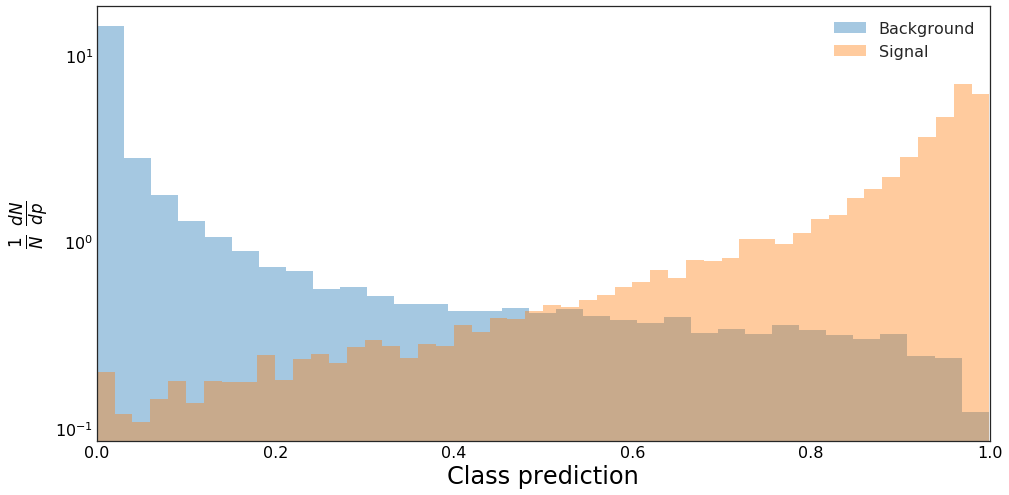

In [7]:
getClassPredPlot([valframe[bkgVal], valframe[sigVal]], weightName='gen_weight')

In [150]:
def amsScan(inData, scale=False):
    best = [0,-1]
    ams = []
    for index, row in inData.iterrows():
        s = np.sum(inData.loc[(inData['pred_class'] >= row['pred_class']) & (inData['gen_target'] == 1), 'gen_weight'])
        b = np.sum(inData.loc[(inData['pred_class'] >= row['pred_class']) & (inData['gen_target'] == 0), 'gen_weight'])
        if scale:
            s *= scale[0]/np.sum(inData[(inData['gen_target'] == 1)]['gen_weight'])
            b *= scale[1]/np.sum(inData[(inData['gen_target'] == 0)]['gen_weight'])
        ams.append(AMS(s, b))
        if ams[-1] > best[1]:
            best = [row['pred_class'], ams[-1]]
    print best
    return ams, best

In [151]:
def foldAMSScan(inData, N=10):
    kf = StratifiedKFold(n_splits=N, shuffle=True)
    folds = kf.split(inData, inData['gen_target'])
    bests = []
    for i, (train, test) in enumerate(folds):
        bests.append(amsScan(inData.iloc[test], (np.sum(inData[(inData['gen_target'] == 1)]['gen_weight']), np.sum(inData[(inData['gen_target'] == 0)]['gen_weight'])))[1])
        print "Fold {}, best AMS {} at cut of {}. Total weights Signal:Bkg. {}:{}".format(i, bests[-1][1], bests[-1][0],
                                                                                          np.sum(inData.iloc[test][inData.gen_target == 1]['gen_weight']),
                                                                                          np.sum(inData.iloc[test][inData.gen_target == 0]['gen_weight']))
    print "Mean cut", np.average([x[0] for x in bests], weights=[1/x[1] for x in bests]), "mean AMS", np.average([x[1] for x in bests], weights=[1/x[1] for x in bests])
    return bests

In [8]:
valframe['ams'] = amsScan(valframe)[0]

[0.9438382387161255, 1.6927561050604285]


In [160]:
bests = foldAMSScan(valframe, 10)

[0.9906197786331177, 2.198795622458006]
Fold 0, best AMS 2.19879562246 at cut of 0.990619778633. Total weights Signal:Bkg. 1.38858509064:746.040771484


/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/home/giles/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[0.9149776101112366, 1.7118851843310903]
Fold 1, best AMS 1.71188518433 at cut of 0.914977610111. Total weights Signal:Bkg. 1.45379328728:818.975341797
[0.9739413857460022, 4.078902555952336]
Fold 2, best AMS 4.07890255595 at cut of 0.973941385746. Total weights Signal:Bkg. 1.43090939522:816.704040527
[0.9467546343803406, 3.092548697060424]
Fold 3, best AMS 3.09254869706 at cut of 0.94675463438. Total weights Signal:Bkg. 1.37144827843:773.111694336
[0.9022144079208374, 3.11781701381934]
Fold 4, best AMS 3.11781701382 at cut of 0.902214407921. Total weights Signal:Bkg. 1.360070467:860.974060059
[0.9788243770599365, 3.7191065139379917]
Fold 5, best AMS 3.71910651394 at cut of 0.97882437706. Total weights Signal:Bkg. 1.37145328522:728.049438477
[0.9711172580718994, 6.3142575148945665]
Fold 6, best AMS 6.31425751489 at cut of 0.971117258072. Total weights Signal:Bkg. 1.21610105038:854.303100586
[0.9852290153503418, 2.394406351379273]
Fold 7, best AMS 2.39440635138 at cut of 0.98522901535. 

[0.9330074191093445, 6.017588759449744]
Fold 56, best AMS 6.01758875945 at cut of 0.933007419109. Total weights Signal:Bkg. 1.16434717178:795.948120117
[0.9705408215522766, 7.161360145215146]
Fold 57, best AMS 7.16136014522 at cut of 0.970540821552. Total weights Signal:Bkg. 1.33798420429:821.329467773
[0.9649891257286072, 4.5700972225425645]
Fold 58, best AMS 4.57009722254 at cut of 0.964989125729. Total weights Signal:Bkg. 1.42364954948:849.944335938
[0.94249427318573, 1.2783399811516372]
Fold 59, best AMS 1.27833998115 at cut of 0.942494273186. Total weights Signal:Bkg. 1.48195171356:789.329040527
[0.9788041710853577, 3.769171647782632]
Fold 60, best AMS 3.76917164778 at cut of 0.978804171085. Total weights Signal:Bkg. 1.5287528038:767.064086914
[0.9829869866371155, 2.8548776355032293]
Fold 61, best AMS 2.8548776355 at cut of 0.982986986637. Total weights Signal:Bkg. 1.49563670158:799.58770752
[0.9862179756164551, 3.7635349073499533]
Fold 62, best AMS 3.76353490735 at cut of 0.98621

Mean cut 0.9519652820188802 mean AMS 3.3092668317031966


In [17]:
def chooseCut(inData, n=1000):
    boot = []
    for i in xrange(n):
        points = np.random.choice(inData.index.tolist(), int(0.1*len(inData)), replace=False)
        boot.append(inData.loc[points].loc[np.argmax(inData.loc[points]['ams'])]['pred_class'])
    print np.mean(boot)

In [18]:
chooseCut(valData[(valData.pred_class >= 0.90) & (valData.pred_class <= 0.96)])

/home/giles/anaconda2/lib/python2.7/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


0.9434592640399933


In [31]:
def scoreTest(ensemble, weights):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    batchEnsemblePredict(ensemble, weights, testData, ensembleSize=10, verbose=1)

def saveTest(cut, name):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [32]:
scoreTest(ensemble, weights)

Predicting batch 1 out of 10
Prediction took 0.000292769744179s per sample

Predicting batch 2 out of 10
Prediction took 0.00029456576434s per sample

Predicting batch 3 out of 10
Prediction took 0.000299801562049s per sample

Predicting batch 4 out of 10
Prediction took 0.000298514288122s per sample

Predicting batch 5 out of 10
Prediction took 0.000296785072847s per sample

Predicting batch 6 out of 10
Prediction took 0.000294825761968s per sample

Predicting batch 7 out of 10
Prediction took 0.000319955799796s per sample

Predicting batch 8 out of 10
Prediction took 0.000263384619626s per sample

Predicting batch 9 out of 10
Prediction took 0.000284967764941s per sample

Predicting batch 10 out of 10
Prediction took 0.000289170399579s per sample



In [5]:
def saveTest(cut, name):
    testData = h5py.File(dirLoc + 'testing.hdf5', "r+")
    
    data = pandas.DataFrame()
    data['EventId'] = getFeature('EventId', testData)
    data['pred_class'] = getFeature('pred', testData)
    
    data['Class'] = 'b'
    data.loc[data.pred_class >= cut, 'Class'] = 's'

    data.sort_values(by=['pred_class'], inplace=True)
    data['RankOrder']=range(1, len(data)+1)
    data.sort_values(by=['EventId'], inplace=True)

    print dirLoc + name + '_test.csv'
    data.to_csv(dirLoc + name + '_test.csv', columns=['EventId', 'RankOrder', 'Class'], index=False)

In [163]:
saveTest(0.9519652820188802, 'Day_4')

../Data/Day_4_test.csv


In [164]:
!kaggle competitions submit -c higgs-boson -f ../Data/Day_4_test.csv -m"Day_4_Basic_Features_256_1e-3_swish_mult2_60E_normedweighted_rot_cart_999->-1, fold mean inverse weighted 100"

Successfully submitted to Higgs Boson Machine Learning Challenge